In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",size=14)
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [49]:
data=pd.read_csv("BreastCancer_data.csv",header=0)
print(data.shape)
print(list(data.columns))

(569, 33)
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [50]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [51]:
data["radius_mean"].unique()

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

In [52]:
len(data["radius_mean"].unique())

456

In [53]:
print((data["diagnosis"].value_counts()/data.shape[0])*100)

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64


In [54]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

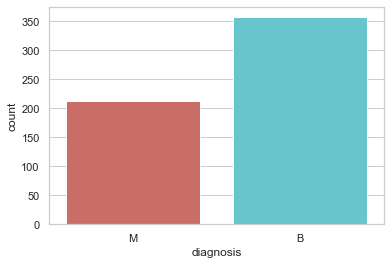

<Figure size 432x288 with 0 Axes>

In [55]:
sns.countplot(x="diagnosis",data=data,palette="hls")
plt.show()
plt.savefig("countplot")

In [56]:
data.groupby("diagnosis").mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


In [57]:
data.groupby("perimeter_mean").mean()

,id,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
perimeter_mean,,,,,,,,,,,,,,,,,,,,,
43.79,862722.0,6.981,13.43,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,...,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382,NaN
47.92,92751.0,7.760,24.54,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN
47.98,921092.0,7.729,25.49,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,...,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938,NaN
48.34,921362.0,7.691,25.44,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,...,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660,NaN
51.71,85713702.0,8.196,16.84,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171.50,8611555.0,25.220,24.91,1878.0,0.10630,0.26650,0.33390,0.184500,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.60760,0.6476,0.28670,0.2355,0.10510,NaN
174.20,899987.0,25.730,17.46,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,23.58,229.30,3234.0,0.15300,0.59370,0.6451,0.27560,0.3690,0.08815,NaN
182.10,873592.0,27.220,21.87,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,0.05770,...,32.85,220.80,3216.0,0.14720,0.40340,0.5340,0.26880,0.2856,0.08082,NaN


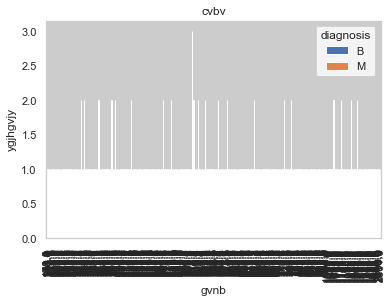

In [58]:
pd.crosstab(data.area_mean,data.diagnosis).plot(kind="bar")
plt.title("cvbv")
plt.xlabel("gvnb")
plt.ylabel("ygjhgvjy")
plt.savefig("fig_area_diagnosis")

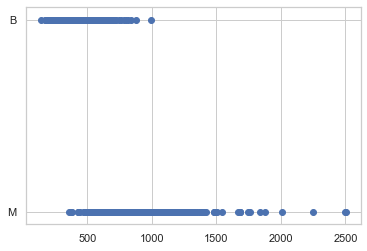

In [59]:
plt.scatter(data.area_mean,data.diagnosis)
plt.show()

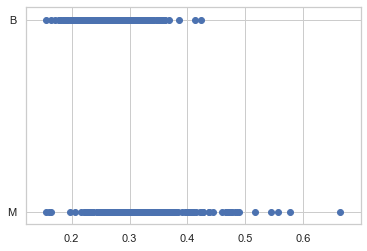

In [60]:
plt.scatter(data.symmetry_worst,data.diagnosis)
plt.show()

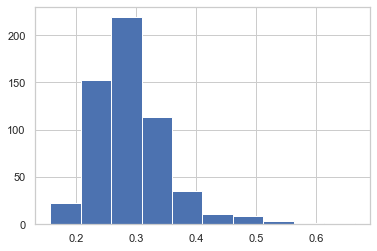

In [61]:
data.symmetry_worst.hist()

In [62]:
unknown=data["Unnamed: 32"]
print(data["Unnamed: 32"])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64


In [63]:
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in "Unnamed: 32"]
print(to_keep)
print(data_vars)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',

In [64]:
data_final=data[to_keep]
data_final.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [65]:
data_final_vars=data_final.columns.values.tolist()
y=["diagnosis"]
X=[i for i in data_final_vars if i not in y]
print(X)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [66]:
from sklearn.feature_selection import RFE
logreg=LogisticRegression()
rfe=RFE(logreg,18)
rfe=rfe.fit(data_final[X],data_final[y])
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False  True False  True  True  True False False
  True False  True False False  True False False False  True  True  True
 False  True False  True  True  True  True]
[13  1  1  1 12  1 14  1  1  1  8  6  1  7  1 10  9  1  4  2 11  1  1  1
  5  1  3  1  1  1  1]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will b

In [67]:
pref_indexes=list(np.where(rfe.ranking_==1)[0])
col=list(np.asarray(X)[pref_indexes])
print(pref_indexes)
print(col)

[1, 2, 3, 5, 7, 8, 9, 12, 14, 17, 21, 22, 23, 25, 27, 28, 29, 30]
['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_se', 'area_se', 'concavity_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [68]:
print(len(col))

18


In [69]:
X=data_final[col]
y=data_final["diagnosis"]

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred=logreg.predict(X_test)
print("accuracy is",logreg.score(X_test,y_test))

accuracy is 0.9122807017543859


In [73]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold=model_selection.KFold(n_splits=10,random_state=7)
modelCV=LogisticRegression()
scoring="accuracy"
results=model_selection.cross_val_score(modelCV,X_train,y_train,cv=kfold,scoring=scoring)
print("10 fold cross validation average accuracy",results.mean())

10 fold cross validation average accuracy 0.9446794871794871


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

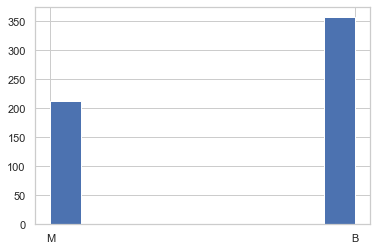

In [75]:
data.diagnosis.hist()

In [74]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[99  9]
 [ 6 57]]
